# Fundamentals of Data Science
Winter Semester 2021

## Prof. Fabio Galasso, Guido D'Amely, Alessandro Flaborea, Luca Franco, Muhammad Rameez Ur Rahman and Alessio Sampieri
<galasso@di.uniroma1.it>, <damely@di.uniroma1.it>, <flaborea.1841969@studenti.uniroma1.it>, <franco.luca.17@gmail.com>, <rahman@di.uniroma1.it>, <alessiosampieri27@gmail.com>

### Group:

* Conti Andrea - 1849300
* Cruoglio Antonella - 2025992
* Iovino Giuliana - 2017512
* Mascolo Davide - 2001991
* Napoli Mario - 2015169

## Exercise 1: Image Filtering and Object Identification

In this exercise you will first familiarise yourself with the basic image filtering routines of Python and NumPy (**Question 1**), then develop a simple image querying system which accepts a query image as input and then finds a set of similar images in the database (**Question 2, 3 and 4**).

This notebook consists of essential functions to solve assignment and questions to be implemented; your task is to fill the missing code "YOUR CODE HERE" part corresponding to each subproblem and produce brief reports on the results whenever necessary.

The filtering part contains two images: *graph.png* and *brick_aliasing.jpg*, which we will use for testing purposes.

In the identification part, you will compare images with several distance functions and evaluate their performance in combination with different image representations. The identification part contains query and model images
for the evaluation, which correspond to the same set of objects photographed from different viewpoints. The files model.txt and query.txt contain lists of image files arranged so that i-th model image depicts the same object as i-th query image. The placeholder scripts will also be used to test your solution.

As part of the exercise, provide an answer to questions in this notebook, in a report-like manner. After you have implemented all the missing code in both exercise parts, you should be able to execute those without errors. Use those to support your answers in the report answers.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.
Submit it by sending an email to galasso@di.uniroma1.it, damely@di.uniroma1.it, rahman@di.uniroma1.it and alessiosampieri27@gmail.com by Wednesday October 20th, 23:59.


## Question 1: Image Filtering **(9 Points)**

Import some useful libraries

In [3]:
## import packages
import numpy as np
from PIL import Image
from scipy.signal import convolve2d 
import matplotlib.pyplot as plt
import cv2
import math
import scipy
from scipy.ndimage import convolve1d
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray

plt.rcParams["figure.figsize"] = (20,8)

In [4]:
def rgb2gray(rgb):
  '''
  RGB -> gray_scale
  '''
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

### Exercise 1 - Code **(7 Points)**

#### Exercise 1.a **(3 Points)**


##### 1-D Gaussian Filter
Implement a method which computes the values of a 1-D Gaussian *Gx* for a given standard deviation $\sigma$ :
\begin{equation}
G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})
\end{equation}

The method should also return a vector *x* of values on which the Gaussian filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

This should be the output with $\sigma=3$.


![](https://drive.google.com/uc?export=view&id=1Q3WIdozsroKzinnlyZhgZHFMdYj7KQrw)


In [5]:
def gauss(sigma):
    """
    Gauss function taking as argument the standard deviation sigma
    The filter should be defined for all integer values x in the range [-3sigma,3sigma]
    The function should return the Gaussian values Gx computed at the indexes x
    """
    x = [i for i in range(-3*sigma, 3*sigma + 1, 1)]
    Gx = []
    for el in x:
        Gx.append(1/(math.sqrt(2*math.pi)*sigma)*math.exp(-el**2/(2*sigma**2)))
    Gx = [float(i)/sum(Gx) for i in Gx]
    return Gx, x

################# Do not write below this line just run #################

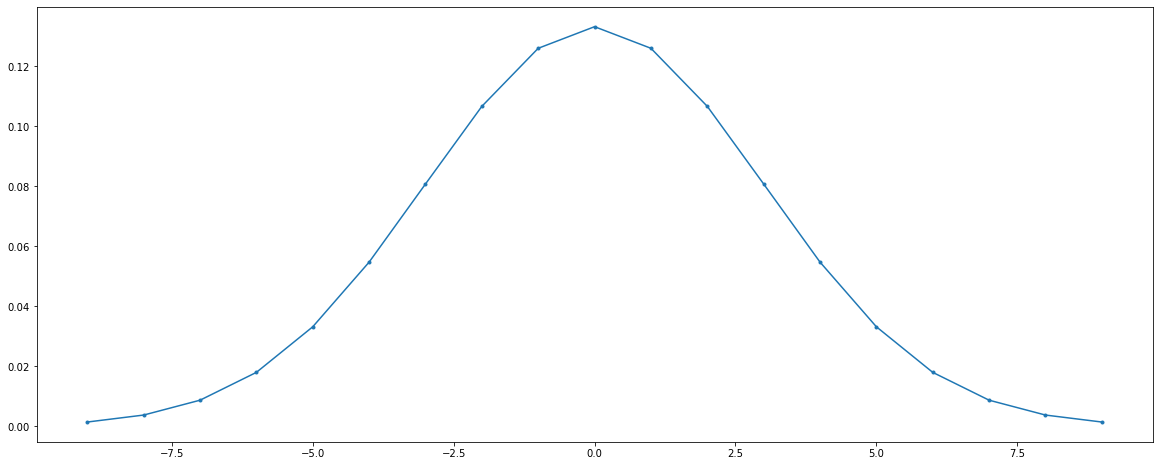

In [6]:
## function gauss
sigma = 3
Gx,x = gauss(sigma)
plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

##### 1-D Box Filter

Implement a method which computes the values of a 1-D Box *Bx* for a given standard deviation $\sigma$ :
\begin{equation}
B= [\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n}]\in \mathbb{R}^n 
\end{equation}

The method should also return a vector *x* of values on which the **Box** filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

An example of Box Filter:

![](https://drive.google.com/uc?export=view&id=1UBpSRYNkZnK2UGmGsMSnrmzwrPyMt6Fz)

In [7]:
def box(filter_size=3,show_verbose=False):
    """
    box function taking as argument the filter size.
    The filter should be defined for all integer values and centered at zero
    The function should return the Box values Bx computed at the indexes x
    """
    x = [0]
    for i in range(1, filter_size//2+1):
        x.append(i)
        x.append(-i)
    x.sort()
    Bx = np.array([1/filter_size for el in x])

    Bx = [float(i)/sum(Bx) for i in Bx]
    return Bx,x

################# Do not write below this line just run #################

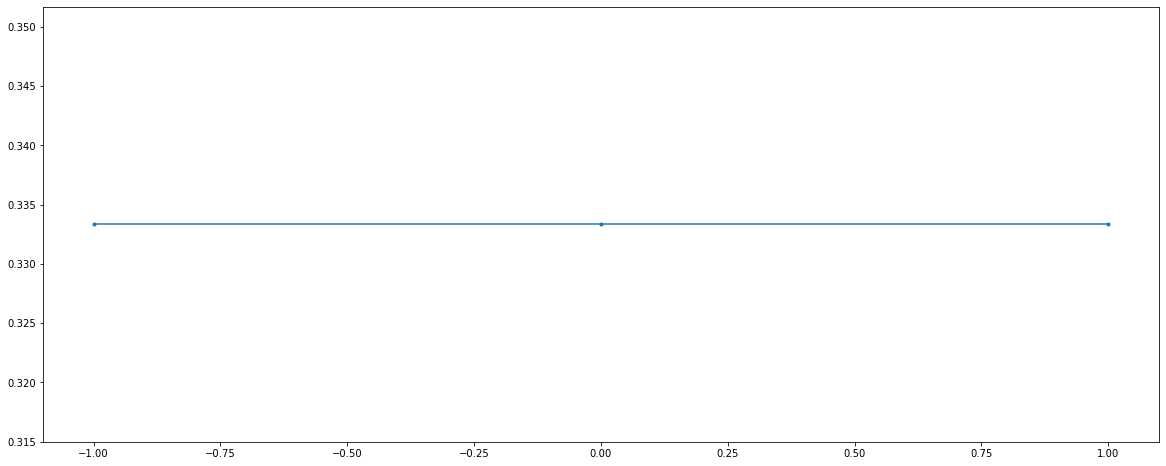

In [8]:
## function box
size = 3
Bx,x = box(size)
plt.figure(1)
plt.plot(x, Bx, '.-')
plt.show()

##### 2-D custom filter
Recreate the given 3x3 filter:

\begin{bmatrix}
-0.015 & -0.035 & -0.015\\
-0.035 & 0.8 &  -0.035 \\
-0.015 & -0.035 & -0.015
\end{bmatrix}

 The absolute value of the elements in the kernel sum to 1, in the middle position we find 80% of the weights and in the corners 30% of the remaining percentage with negative sign.

In [9]:
def custom():
    """
    This function returns the shown kernel.
    """
    Gx = [-0.015, -0.035, -0.015, -0.035, 0.8,  -0.035, -0.015, -0.035, -0.015]
    Gx = np.reshape(Gx, (3, 3))

    return Gx

################# Do not write below this line just run #################

In [10]:
custom_filter = custom()
print(custom_filter)

[[-0.015 -0.035 -0.015]
 [-0.035  0.8   -0.035]
 [-0.015 -0.035 -0.015]]


##### Gauss derivative 1-D
Implement a function gaussdx for creating a Gaussian derivative filter in 1D:
$$
\frac{d}{dx}G =-\frac{1}{\sqrt{2\pi}\sigma^3}x\exp({-\frac{x^2}{2\sigma^2}})
$$
As in 1.a-1.b, the function should also return a vector x of values on which the Gaussian derivative filter is
defined: integer values on the interval $[3\sigma; 3\sigma]$.

An example of Gauss derivative 1-D:

![](https://drive.google.com/uc?export=view&id=1QZmVMxJiOARKe5MoqzZ7SSSjFikoY2ty)

In [11]:
def gaussdx(sigma):
    x = [i for i in range(-3*sigma, 3*sigma + 1, 1)]
    Dx = []
    for el in x:
        Dx.append(-(1/(math.sqrt(2*math.pi)*sigma**3))*el*math.exp(-el**2/(2*sigma**2))) 
    return Dx, x

################# Do not write below this line just run #################

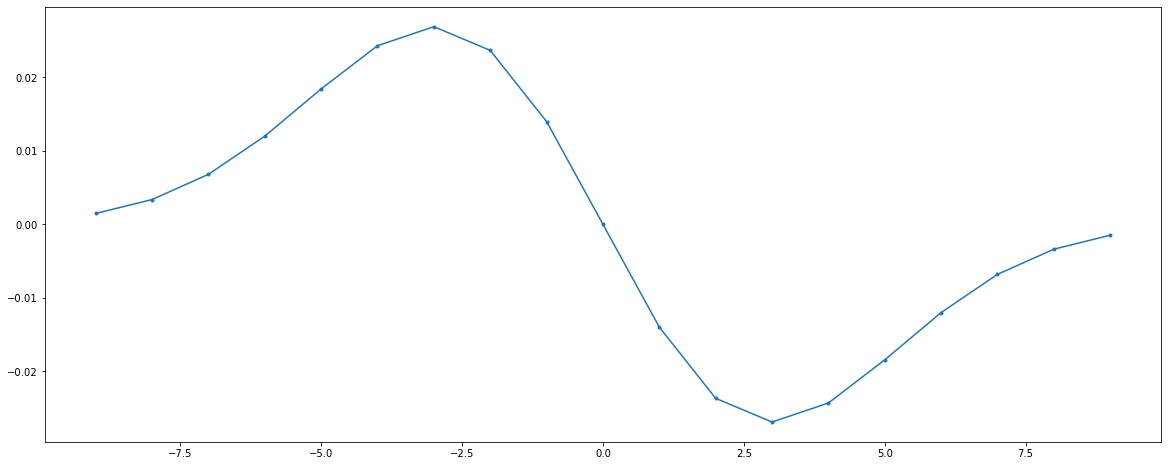

In [12]:
## function gaussdx
sigma = 3
DGx,x = gaussdx(sigma)
plt.figure(1)
plt.plot(x, DGx, '.-')
plt.show()

#### Exercise 1.b **(3 Points)**

Here you have to convolve the filters you have just defined with the given image _'graf.png'_. Remember that "Box" and "Gaussian" filters are separable.

##### 2-D Gaussian filter
The function should take an image as an input
and return the result of convolution of this image with 2D Gaussian kernel. You can take advantage of the Python’s convolve2D function if you don’t want to
implement convolution yourself.

See figure below for illustration
of Gaussian filtering. 
![](https://drive.google.com/uc?export=view&id=1GtsTZXlnj811pJi1VnamdtDCvhqHiu8j)



In [13]:
def gaussfiltering(img, sigma):
    """
    Implement a 2D Gaussian filter, leveraging the previous gauss.
    Implement the filter from scratch or leverage the convolve or convolve2D methods (scipy.signal)
    Leverage the separability of Gaussian filtering
    Input: image, sigma (standard deviation)
    Output: smoothed image
    """
 
    f1 = np.array(gauss(sigma)[0])
    smooth_img = convolve1d(img, f1)
    smooth_img = smooth_img.transpose()

    smooth_img = convolve1d(smooth_img, f1)

    return np.array(smooth_img.transpose())


################# Do not write below this line just run #################

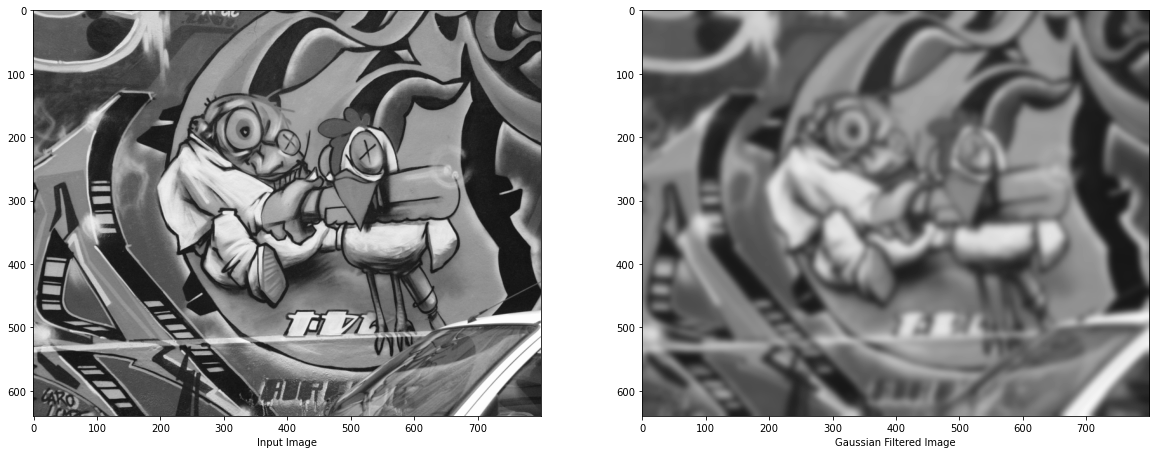

In [14]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = gaussfiltering(img, 5)

plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gaussian Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### 2-D Box filter
The function should take an image as an input
and return the result of convolution of this image with 2D Box kernel. 

See figure below for illustration of Box filtering.

![Original Image](https://drive.google.com/uc?export=view&id=1IMrJUuTouVHmaiiyWB6H1QbKLzYTg9qC)



In [15]:
def boxfiltering(img, filter_size):
    """
    Implement a 2D Box filter, leveraging the previous box.
    Leverage the separability of Box filtering
    Input: image, filter_size
    Output: smoothed image
    """
    f1 = np.array(box(filter_size)[0])
    f2 = np.array([f1])
    f2 = f2.T 
    smooth_img = convolve1d(img, f1) 
    smooth_img = convolve2d(smooth_img, f2, mode = 'same')

    return np.array(smooth_img)

################# Do not write below this line just run #################

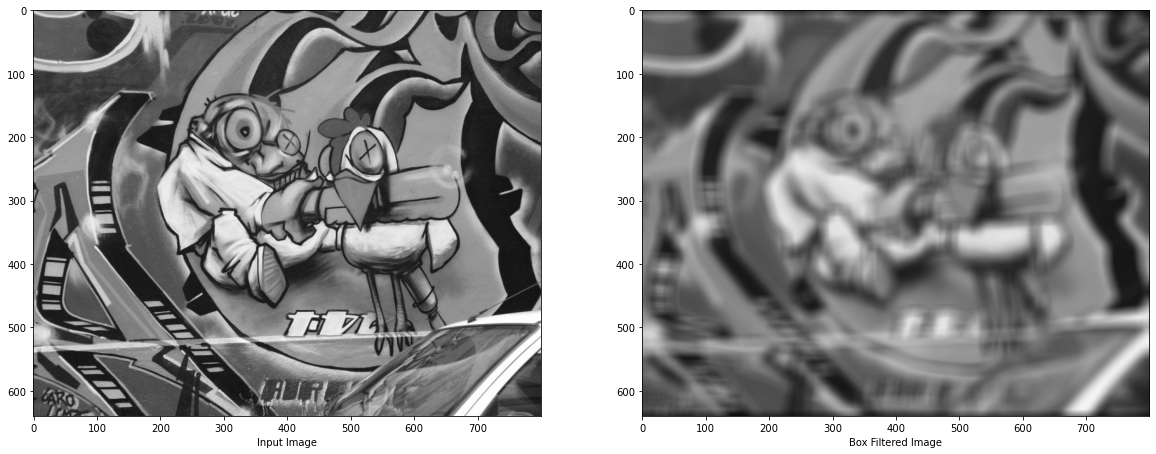

In [16]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = boxfiltering(img, 20)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Box Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### Custom Filter

The function should take an image and return the result of the convolution of this image with the custom filter we have defined in exercise 1.a.

See figure below for an illustration of this custom filter.

![](https://drive.google.com/uc?export=view&id=1N1wEkhqOuAX3TusQNNxN9KPOXb9nRsFn)



In [17]:
def customfiltering(img):
    """
    Implement a 2D Custom filter

    Implement the filter from scratch 
    Input: image
    Output: smoothed image
    """
    smooth_img = convolve2D(img, custom())
    return np.array(smooth_img)

def convolve2D(image, kernel):

    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image 
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape)) + 1)
    yOutput = int(((yImgShape - yKernShape)) + 1)
    output = np.zeros((xOutput, yOutput))

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        
        for x in range(image.shape[0]):
            if x > image.shape[0] - xKernShape:
                break
            try:
                output[x, y] = (kernel * image[x: x + xKernShape, y: y + yKernShape]).sum()
            except:
                break

    return output

################# Do not write below this line just run #################

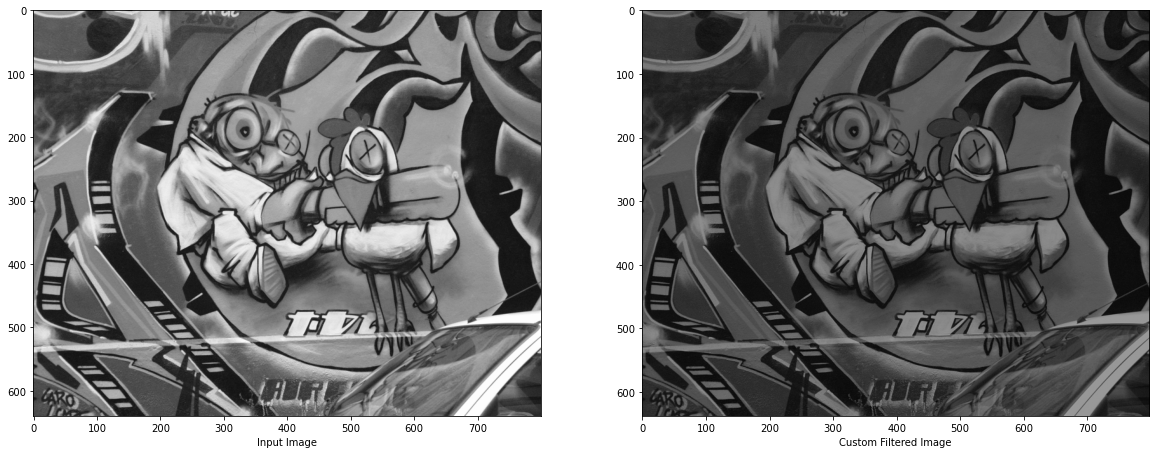

In [18]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = customfiltering(img)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Custom Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

#### Exercise 1.c **(1 Points)**

Implement a Gaussian Pyramid: Write a function for downscaling (you can use the function [resize from cv2](https://docs.opencv.org/master/dd/d52/tutorial_js_geometric_transformations.html) library) and use the Gaussian filter to blur it. The Pyramid must consist of three steps: 

* Apply Gaussian filter on original Image
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.

See figure below for an illlustration of Gaussian Pyramid.
![](https://drive.google.com/uc?export=view&id=1JKeyNozWgoBWHqrUwj4SEF6SJEnO9uMt)


In [19]:
def downscale(img, factor):
    '''
  This function should return the given image
  resized by the factor.
  Input:
    img: the image to resize
    factor: the factor you want use to downscale
  Output:
    resized: the resized image
    '''
    x = int(len(img) * .5)
    y = int(len(img[0]) * .5)
    resized_img = cv2.resize(img, (y, x))
    return resized_img, y, x

In [20]:
def GaussianPyramid(img, steps=3, factor=0.5, sigma=4):
    '''
  This function implements the Gaussian Pyramid and shows the results.
  Leverage the "downscale" function.
  
  Inputs:
    img: the image
    steps: number of steps to use in performing the Pyramid
    factor: the scaling factor to resize the image at each step
    sigma: the Gaussian filter parameter
  
  Output:
    --
  '''
    res1 = gaussfiltering(img, sigma)
    plt.figure(2)
    ax1 = plt.subplot(1,2,1)
    ax1.set_xlabel(" ")
    ax2 = plt.subplot(1,2,2)
    ax2.set_xlabel(" ")
    plt.sca(ax1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.sca(ax2)
    plt.imshow(res1, cmap='gray', vmin=0, vmax=255)
    img = res1
    plt.show()
    x = 20
    y = 8
    for i in range(steps - 1):
        x = x // 2
        y = y // 2
        tmp = downscale(img, factor)
        res1 = tmp[0]
        res2 = gaussfiltering(res1, sigma)
        plt.rcParams["figure.figsize"] = [x, y]
        ax1 = plt.subplot(1,2,1)
        ax1.set_xlabel(" ")
        ax2 = plt.subplot(1,2,2)
        ax2.set_xlabel(" ")
        plt.sca(ax1)
        plt.imshow(res1, cmap='gray', vmin=0, vmax=255)
        plt.sca(ax2)
        plt.imshow(res2, cmap='gray', vmin=0, vmax=255)
        img = res2        
        plt.show()
    plt.rcParams["figure.figsize"] = [20, 8]

In [21]:
import cv2

################# Do not write below this line just run #################

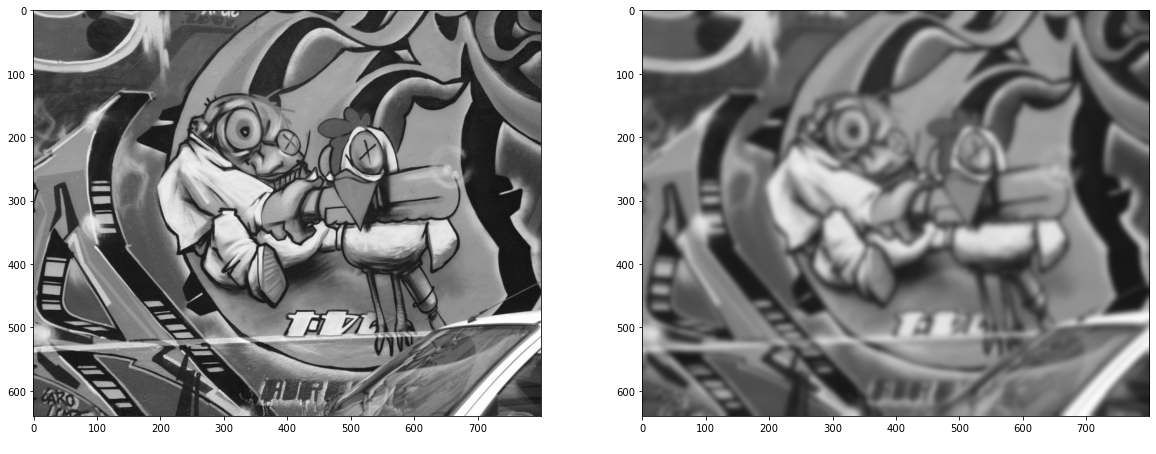

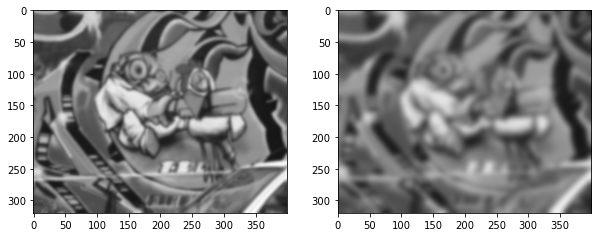

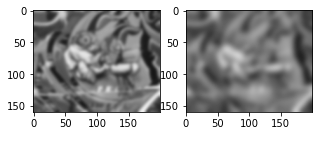

In [22]:
img = rgb2gray(np.array(Image.open('graf.png')))
GaussianPyramid(img)

### Exercise 1 - Report **(2 Points)**

Use the images from the previous exercises to write a report on what you learned about filters and convolutions **(in the text block below)**.
In report, you should also compare your results: use the three filters you just created and apply on 'brick_aliasing.jpg' file and identify which filter is applied on Image A, Image B and Image C illustrated in Figure below. Use 7 as filter_size both for Gaussian and Box filter.

![](https://drive.google.com/uc?export=view&id=1eDOTU7FIRht9WMiAeW3ZlsFnpAlW_ZGm)

**Write your Report here**
 

- Image A filter -> Gaussian
- Image B filter -> Box
- Image C filter -> Custom

Digital filters are used to blur and sharpen digital images. 
Filtering is performed by convolution with specifically designed kernels (filters).
In order to reduce image noise and reduce detail of an image, we can use different filters like the **Gaussian filter** and the **Box Filter**.
Their effects are similar, but the Gaussian filter creates a more diffused effect than the Box blur filter.
In the gaussian filter we take values from the gaussian distribution and use them to build a convolution matrix which is applied to the original image.
Each of the pixels in the kernel has a different weight: we give the center pixel the most priority and pixels furthest away from the center less priority. So, each pixel's new value is set to a weighted average of that pixel's neighborhood. Note that larger values of sigma produce a higher blurring.

Box-filter returns a smoothed image too. The main difference is that here all the pixels are weighed equally: each pixel in the resulting image has a value equal to the average value of its neighbouring pixels in the input image.

As we can see in the previous exercise, we get similar images applying these two filters, but the Gaussian give a nice smooth image, while the box filter give edgy artifacts.

The **Custom Filter** is built in such a way that the absolute value of the elements in the kernel sum to 1, in the center there is most of the weight and the rest has negative sign. This filter doesn’t blur the image but make it darker as we can see in the last plot of the previous exercise.


## Question 2: Identification **(10 Points)**

Import some useful libraries

In [23]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist
import matplotlib.pyplot as plt

In [24]:
def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

### Exercise 2 - Code

#### Exercise 2.a **(3 Points)**
For this question,  implement the
function **normalized hist**, which takes gray-value image as input and returns normalized histogram of
pixel intensities. When quantizing the image to compute the histogram, consider that pixel intensities
range in $[0, 255]$.
Compare your implementation with built-in Python function numpy.histogram. Your histograms and
histograms computed with Python should be approximately the same. (3 points)

In [25]:
def normalized_hist(img_gray, num_bins = 40, show_verbose = False):
    '''
    Compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
    assume that image intensity is between 0 and 255

    img_gray - input image in grayscale format
    num_bins - number of bins in the histogram

    '''
    hists, bins = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
    hists = [float(i)/sum(hists) for i in hists]

    return hists, bins

################# Do not write below this line just run #################

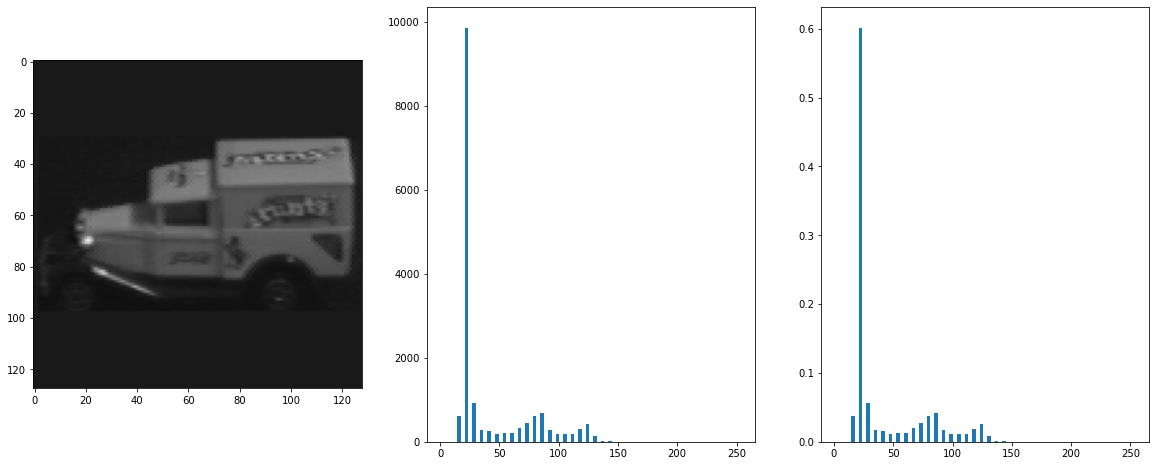

In [26]:
img_color = np.array(Image.open('model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1, width=3)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2, width=3)
plt.show()

#### Exercise 2.b **(6 Points)**
Implement the histogram types. Your implementation should
complete the scripts provided in the functions rgb_hist, rg_hist and dxdy_hist.
As above, when quantizing the images to compute the histogram, consider that “RGB” and “RG” range in
$[0, 255]$. For the case of dxdy hist, the actual image value ranges depend on the chosen Gaussian filtering
variance, used when computing the derivative. For this exercise, set the standard deviation $σ = 3.0$ and
cap the pixel values to be in the range $[−6, 6]$, i.e. set all values below (above) the value of -6 (+6) to -6
(+6). (3 points)

##### RGB

In [27]:
def rgb_hist(img_color_double, num_bins = 5, show_verbose = False):
    hists = np.zeros((num_bins, num_bins, num_bins))
    img = img_color_double.reshape(-1,3)
    img = np.floor(img * num_bins/255).astype("int")

    #Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0] * img_color_double.shape[1]):
        pixel = img[i]
        hists[pixel[0], pixel[1], pixel[2]] += 1
        
    #Normalize the histogram such that its integral (sum) is equal 1
    hists = hists.reshape(hists.size)
    hists = hists/hists.sum()
    return hists

In [28]:
plt.rcParams["figure.figsize"] = (5,6.2)

################# Do not write below this line just run #################

<BarContainer object of 125 artists>

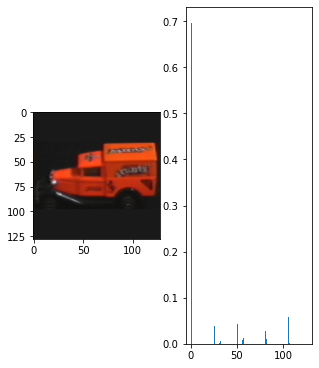

In [29]:
# Compose and test RGB histograms (rgb_hist)
plt.figure(2)

plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5

plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1, hist_rgb1.size+1)),hist_rgb1)

##### RG

In [30]:
def rg_hist(img_color_double, num_bins = 5, show_verbose = False):
    hists = np.zeros((num_bins, num_bins))
    img = img_color_double.reshape(-1,3)
    img = np.floor(img * num_bins/255).astype("int")

    #Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0] * img_color_double.shape[1]):
        pixel = img[i]
        hists[pixel[0], pixel[1]] += 1
        
    #Normalize the histogram such that its integral (sum) is equal 1
    hists = hists.reshape(hists.size)
    hists = hists/hists.sum()
    return hists

################# Do not write below this line just run #################

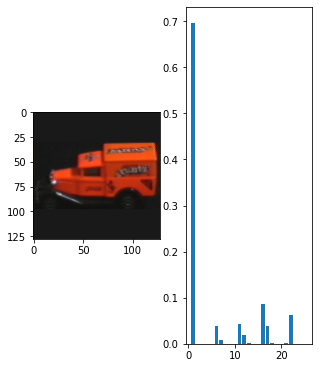

In [31]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

##### DXDY

In [32]:
def gaussderiv(img, sigma):
    
    # 1D gaussian_filter
    Gx,x = gauss(sigma)
    Gx = np.array(Gx)
    Gx = Gx.reshape(1,len(Gx))
    
    # 1D gaussdx_filter
    Dx,x = gaussdx(sigma)
    Dx = np.array(Dx)
    Dx = Dx.reshape(1,len(Dx))
    
    # Convolve the two filters
    gaussderiv_filter = convolve2d(Dx.T,Gx)
    
    # x-direction
    imgDx = convolve2d(img,gaussderiv_filter.T, mode='same')      
    
    # y-direction
    imgDy = convolve2d(img,gaussderiv_filter, mode='same')
    
    return imgDx, imgDy

In [33]:
def dxdy_hist(img_gray, num_bins = 5, show_verbose = False):
    '''
    Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
    Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
    The histogram should be normalized so that sum of all values equals 1

    img_gray - input gray value image
    num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2

    Note: you can use the function gaussderiv from the Filtering exercise
    '''
    
    imgDx, imgDy = gaussderiv(img_gray, 3)
    
    imgDx, imgDy = np.clip(imgDx, -6, 6),np.clip(imgDy, -6, 6)
    
    hists = np.zeros((num_bins, num_bins), dtype=np.int32)
    
    # Compute the size of a bin
    bin_size = 12 / num_bins
    
    imgDx -=6
    imgDy -=6
    
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            dx = math.floor(imgDx[i,j]/bin_size)
            dy = math.floor(imgDy[i,j]/bin_size)
            
            hists[dx, dy] += 1

    hists = hists/np.sum(hists)
    hists = np.ndarray.flatten(hists)
    
    return hists

################# Do not write below this line just run #################

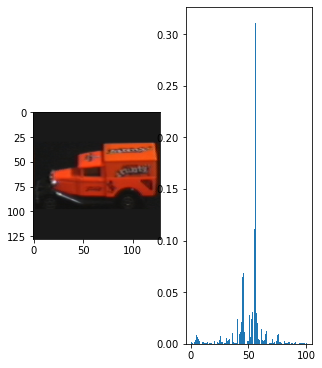

In [34]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)
plt.figure(5)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

#### Exercise 2.c **(1 Point)**
Implement the histogram distance functions. 

In more details, implement the function *dist_intersect*:
\begin{equation}
\bigcap(Q,V)=1-\frac{1}{2}\left(
\frac{\sum_i \min(q_i,v_i)}{\sum_i q_i} +
\frac{\sum_i \min(q_i,v_i)}{\sum_i v_i}
\right)
\end{equation}

the *dist_l2* function:
\begin{equation}
d(Q,V)=\sqrt{\sum_i (q_i-v_i)^2}
\end{equation}

and the *dist_chi2*:
\begin{equation}
\chi^2(Q,V)=\sum_i \frac{(q_i-v_i)^2}{q_i + v_i}
\end{equation}


In [35]:
from math import sqrt

def dist_intersect(x,y):
    '''
    Compute the intersection distance between histograms x and y
    Return 1 - hist_intersection, so smaller values correspond to more similar histograms
    Check that the distance range in [0,1]
    '''
    n = len(x)
    min_sum = 0
    for i in range(n):
        min_sum += min(x[i],y[i])

    hist_intersection = 0.5*(min_sum/sum(x) + min_sum/sum(y))
    assert(0 <= (1- hist_intersection) <=1)
    return 1 - hist_intersection


def dist_l2(x,y):
    '''
    Compute the L2 distance between x and y histograms
    Check that the distance range in [0,sqrt(2)]
    '''
    s = 0
    for i in range(len(x)):
        s += (x[i] - y[i])**2
    l2_dist = sqrt(s)

    assert(0 <= l2_dist <= sqrt(2))
    return l2_dist


def dist_chi2(x,y):
    '''
    Compute chi2 distance between x and y
    Check that the distance range in [0,Inf]
    Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0
    '''
    
    chi2_dist = 0
    
    for i in range(len(x)):
        if x[i]+y[i] != 0:
            chi2_dist += ((x[i] - y[i])**2 / (x[i] + y[i]))
        else:
            chi2_dist+=0

    assert(chi2_dist >= 0)
    return chi2_dist

## Question 3: Object Identification **(11 Points)**

### Exercise 3 - Code **(7 Points)**

#### Exercise 3.a **(4 Points)**
Having implemented different distance functions and image histograms, you can now test how suitable
they are for retrieving images in query-by-example scenario. Implement a function find_best_match which takes a list of model images and a list of query images and for each query im-
age returns the index of closest model image. The function should take string parameters, which identify
distance function, histogram function and number of histogram bins. See comments in the beginning of
find_best_match function for more details. Additionally to the indices of the best matching images your implemen-
tation should also return a matrix which contains distances between all pairs of model and query images.
(3 points)

In [36]:
def is_grayvalue_hist(hist_name):
  '''
  Handle function to discriminate when your input 
  function is in gray_scale or colors.
  '''
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
  '''
  Handle function to get the correct historgam function 
  by his name.
  '''
  if hist_name == 'grayvalue':
    return normalized_hist(img, num_bins_gray)
  elif hist_name == 'rgb':
    return rgb_hist(img, num_bins_gray)
  elif hist_name == 'rg':
    return rg_hist(img, num_bins_gray)
  elif hist_name == 'dxdy':
    return dxdy_hist(img, num_bins_gray)
  else:
    assert False, 'unknown hist type: %s'%hist_name


def get_dist_by_name(x, y, dist_name):
  '''
  Handle function to get the correct distance function 
  by his name.
  '''
  if dist_name == 'chi2':
    return dist_chi2(x,y)
  elif dist_name == 'intersect':
    return dist_intersect(x,y)
  elif dist_name == 'l2':
    return dist_l2(x,y)
  elif dist_name == 'all':
    return (dist_chi2(x,y), dist_intersect(x,y), dist_l2(x,y))
  else:
    assert False, 'unknown distance: %s'%dist_name

def read_files():
  '''
  Handle function to read query and model files
  '''
  with open('model.txt') as fp:
    model_images = fp.readlines()
  model_images = [x.strip() for x in model_images]

  with open('query.txt') as fp:
    query_images = fp.readlines()
  query_images = [x.strip() for x in query_images]

  return query_images, model_images

In [37]:
# note: use functions 'get_dist_by_name', 'get_hist_by_name' and 'is_grayvalue_hist' to obtain 
#       handles to distance and histogram functions, and to find out whether histogram function 
#       expects grayvalue or color image

def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
    '''
    this function returns a list containing the histograms for
    the list of images given as input.
    '''
    out = []
    for i in image_list:
        img = np.array(Image.open(i)).astype('double')
        out.append(get_hist_by_name(img, num_bins, hist_type))

    return out



def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
    '''
    Function to find the best match for each image in the 
    query folder.
    Input:
    model_images: list of strings with the path of model images.
    query_images: list of strings with the path of query images.
    dist_type:    a string to represent the name of the distance you want to 
                  use. Should be one among "l2", "intersect", "chi2".
    hist_type:    a string to represent the name of the histogram you want to 
                  use. Should be one among "grayvalue", "rgb", "rg", "dxdy".

    Output:
    best_match:   list containing in each position the index of the retrieved
                  best matching image.
    D:            Matrix with |model_images| rows and |query_images| columns
                  containing the scores of each matching.
    '''
    hist_isgray = is_grayvalue_hist(hist_type)
    
    modelhists = compute_histograms(model_images, hist_type, hist_isgray, num_bins)
    queryhists = compute_histograms(query_images, hist_type, hist_isgray, num_bins)

    best_match = []
    D = np.zeros((len(modelhists),len(queryhists)))
    for i in range(len(queryhists)):
        distmodel = []
        for j in range(len(modelhists)):
            dist = get_dist_by_name(queryhists[i], modelhists[j], dist_type)
            D[j, i] = dist
            distmodel.append(dist)
        best_match.append(distmodel.index(min(distmodel)))


    return best_match, D

################# Do not write below this line just run #################

In [38]:
# model_images - list of file names of model images
# query_images - list of file names of query images

query_images, model_images = read_files()

dist_type = 'intersect'
hist_type = 'rgb'
num_bins = 10

[best_match, D] = find_best_match(
    model_images, query_images, dist_type, hist_type, num_bins)

print("Indexes of correct retrieved images is:\n ", *np.where(best_match == np.arange(len(query_images))))
print("The Recognition rate is", sum(best_match == np.arange(len(query_images)))/len(query_images))

Indexes of correct retrieved images is:
  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 17 18 19 21 22 23 24 26 27
 28 29 30 32 33 36 37 38 39 40 42 43 44 45 46 48 49 50 51 52 54 55 56 57
 58 59 60 64 66 69 70 71 72 74 75 77 79 80 81 82 83 84 85 86 87 88]
The Recognition rate is 0.7865168539325843


#### Exercise 3.b **(3 Points)**
Implement a function **show_neighbors** which takes a list of model images and a list of
query images and for each query image visualizes several model images which are closest to the query image
according to the specified distance metric. Use the function find best match in your implementation. See the Figure below for example of the output.

![](https://drive.google.com/uc?export=view&id=1qlPbNzh92u9EU4kzNMbHg0uRgSk4AnRO)


In [39]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
    '''
    For each image file from 'query_images' find and visualize the 5 nearest images from 'model_image'.

    Note: use the previously implemented function 'find_best_match'
    Note: use subplot command to show all the images in the same Python figure, one row per query image

    '''

    best_match, D = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)

    five = []

    for col in range(D.shape[1]):
        five.append(D[:, col].argsort()[0:5])


    fig, axs = plt.subplots(3, 6)
    for i, best in enumerate(five):


        img_color = np.array(Image.open(query_images[i]))
        axs[i, 0].axis('off')
        axs[i, 0].set_title('Q' + str(i), size=25)
        
        axs[i, 0].imshow(img_color, vmin=0, vmax=255)

        for j, img in enumerate(best):
            img_color = np.array(Image.open(model_images[img]))
            axs[i, j+1].axis('off')
            title = 'M' + str(round(D[img, i], 2))
            axs[i, j+1].set_title(title, size=25)
            axs[i, j+1].imshow(img_color, vmin=0, vmax=255)
            
    plt.show()

    plt.close()

In [40]:
plt.rcParams["figure.figsize"] = [20,8]

################# Do not write below this line just run #################

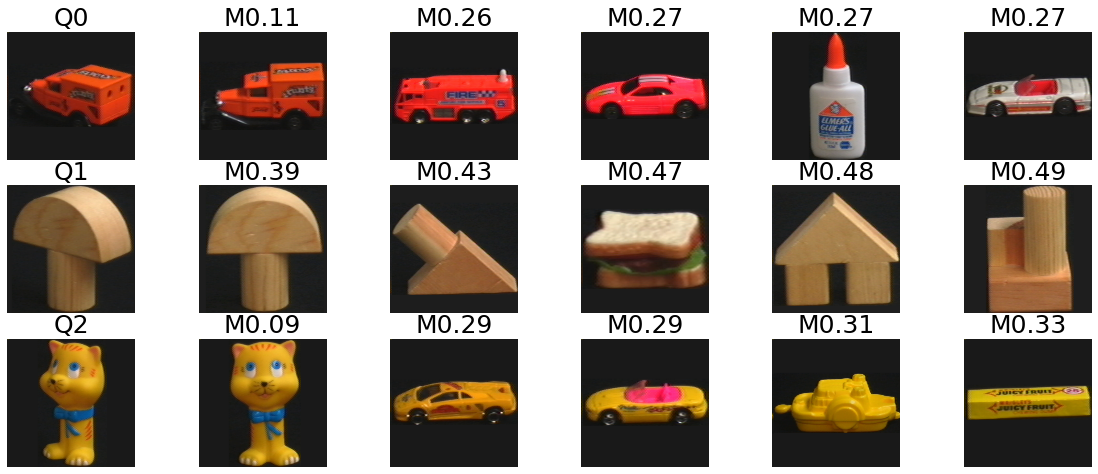

In [41]:
## visualize nearest neighbors
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

#### Metric
 Use the function find best match to compute recognition rate for different combinations of distance and
histogram functions. The recognition rate is given by a ratio between number of correct matches and total
number of query images.


################# Do not write below this line just run #################

In [42]:
num_correct = sum(np.array(best_match) == range(len(query_images)))
print('number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(query_images)))

number of correct matches: 70 (0.786517)



In [43]:
bins = [10, 15, 20, 25]
dist_type = 'all'
hist_type = 'rgb'
dist = ['intersect', 'l2', 'chi2']

for num in bins:
    for el in dist:
        [best_match, D] = find_best_match(model_images, query_images, el, hist_type, num)
        num_correct = sum(np.array(best_match) == range(len(query_images)))
        print(f'num_bins: {num}, dist_type = {el}. number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(query_images)))

num_bins: 10, dist_type = intersect. number of correct matches: 70 (0.786517)

num_bins: 10, dist_type = l2. number of correct matches: 54 (0.606742)

num_bins: 10, dist_type = chi2. number of correct matches: 69 (0.775281)

num_bins: 15, dist_type = intersect. number of correct matches: 78 (0.876404)

num_bins: 15, dist_type = l2. number of correct matches: 51 (0.573034)

num_bins: 15, dist_type = chi2. number of correct matches: 78 (0.876404)

num_bins: 20, dist_type = intersect. number of correct matches: 71 (0.797753)

num_bins: 20, dist_type = l2. number of correct matches: 42 (0.471910)

num_bins: 20, dist_type = chi2. number of correct matches: 71 (0.797753)

num_bins: 25, dist_type = intersect. number of correct matches: 81 (0.910112)

num_bins: 25, dist_type = l2. number of correct matches: 45 (0.505618)

num_bins: 25, dist_type = chi2. number of correct matches: 79 (0.887640)



### Report **(4 Points)**

Experiment with different functions and numbers of histogram bins, try to find
combination that works best. **Submit the summary of your experiments in a report as part of your solution.**


**Write your Report here**


|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 | 10 | intersect | 0.786517 |
| 2 | 10 | l2 | 0.606742 |
| 3 | 10 | chi2 | 0.775281 |
| 4 | 15 | intersect | 0.876404 |
| 5 | 15 | l2 | 0.573034 |
| 6 | 15 | chi2 | 0.876404 |
| 7 | 20 | intersect | 0.797753 |
| 8 | 20 | l2 | 0.471910 |
| 9 | 20 | chi2 | 0.797753 |
| 10 | 25 | intersect | 0.910112 |
| 11 | 25 | l2 | 0.505618 |
| 12 | 25 | chi2 | 0.887640 |


Considering different numbers of bins (10, 15, 20, 25) and different types of distance metrics (intersection, euclidean, chi2), the best combination is given by num_bins = 25 and metric = intersect because it can get an accuracy of 0.91.

Both Intersection and chi2 give good performances, in fact intersection is a bit more robust and chi2 is a bit more discriminative. Instead euclidean distance give worst results because it is not robust enough.

## Question 4: [K-Means]((https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)) 
###(Bonus question for **5 Points**, not compulsory)

Recolor the original images and Query images by using Kmeans. And find the best matches between the two.

There are several way to preprocess an image, and in this exrcise you will work with "recoloration". Given an image, you will use a Kmeans model to transform it, and use the same model to transform the images that belongs to the model folder, then repeat the previous to exercises to extract the RGB hist and find the best match. We'll provide the method to fit a KMeans model on an image and to transform an image given a KMeans model. You should then use these functions, applying them on the query images (to retrieve recolored images and a KMeans_model for each query image) and on the model images. Pay attention on the fact that you should use a model fitted on a query image on the whole model folder to have coherent results.

In the following example, the KMeans model has been fitted on three different images: [Row 1] then these models are used to transform original images to recolored images [Row 2:4]

![](https://drive.google.com/uc?export=view&id=1m0Wu2n12BflIwMHL1g3LUxHurotxrPWr)

#### Exercise 4 - Code **(3 Points)**


In [44]:
from sklearn.cluster import KMeans
import numpy as np

def fitting_kmeans(query, K):
  '''
  fit a Kmeans model on 1 image.
  return the recolored image and the KM model
  '''
  shape_ = query.shape
  kmeans = KMeans(K)
  data = query.reshape(-1, 3)
  kmeans.fit(data)
  query_recolored = kmeans.cluster_centers_[kmeans.predict(data)]

  return query_recolored.reshape(shape_), kmeans


def apply_kmeans(km_model, model_image):
  '''
  transform with a Kmeans model 1 image.
  return the recolored image.
  '''

  shape_ = model_image.shape
  data = model_image.reshape(-1, 3)
  img_recolored = km_model.cluster_centers_[km_model.predict(data)]

  return img_recolored.reshape(shape_)

In [45]:
def compute_KM_histograms(image_list, num_bins=10):
    '''
    Function to compute histograms of a list of images.
    Leverage the "rgb_hist" function previously coded.
    '''


    image_hists = [rgb_hist(i, num_bins) for i in image_list]

    return image_hists

In [46]:
def compute_KMeans(model_list, query_list, K):
    '''
    Function to compute the recolored images from both query and 
    model lists. You should:
    1. Apply the fitting metod to queries retrieving the ist of recolored
       queries and KMeans models.
    2. Apply the transforming method on all the images in the model folder
       for each KMeans you fitted in the previous step.
    3. Return the 2 lists of recolored images.
    '''
    query_recolored_imgs = []
    query_km_models = []
    model_recolored_imgs = []

    model_list = [np.array(Image.open(i)) for i in model_list]
    query_list = [np.array(Image.open(i)) for i in query_list]

    for i in query_list:
        fit, kmeans = fitting_kmeans(i, K)
        query_recolored_imgs.append(fit)
        query_km_models.append(kmeans)

    for i in range(len(model_list)):
        recol_mod = apply_kmeans(query_km_models[i], model_list[i])
        model_recolored_imgs.append(recol_mod)

    return query_recolored_imgs, model_recolored_imgs


def compute_recolored_hists(query_recolored, model_recolored):
    '''
    Function to compute the histograms of lists of images.
    Use the compute_KM_histograms function.
    '''

    query_hists = compute_KM_histograms(query_recolored)
    model_hists = compute_KM_histograms(model_recolored)

    return query_hists, model_hists

## funzione ausiliaria
def best(q_hists, m_hists, dist_type):
    best_match = []
    D = np.zeros((len(m_hists),len(q_hists)))
    for i in range(len(q_hists)):
        distmodel = []
        for j in range(len(m_hists)):
            dist = get_dist_by_name(q_hists[i], m_hists[j], dist_type)
            D[j, i] = dist
            distmodel.append(dist)

        best_match.append(distmodel.index(min(distmodel)))
    return best_match
    
def compute_matching(q_hists, m_hists, dist_type):
    '''
    Function to compute the scores among several histograms.
    Similarly to find_best_match function you have previously defined,
    this function will return the best_match list.

    EXTRA: add the 'all' dist_type wich compute the scores for all 3 
    kind of distances, exploiting the strength of modulation!
    '''
    if dist_type == 'all':
        dist = ['intersect', 'l2', 'chi2']
        best_match = []
        for el in dist:  
            best_match.append(best(q_hists, m_hists, el))

    else:
        best_match = (best(q_hists,m_hists, dist_type))

    return best_match

def print_corrects_KM(match, tot_q_images, dist_type, K):
    '''
    Function to print the results.
    Input:
    match: the best_match results
    tot_images: len(model_images)
    dist_type: among 'l2', 'intersect' and 'chi2' (EXTRA: 'all')
    K: K-Means parameter

    last three args should be expicitly printed by this function.

    Example of Output:

    Settings: K=30, dist=chi2
    Results: Number of correct matches: 58/89 (65.17%)
    '''
    if dist_type == 'all':
        dist = ['intersect', 'l2', 'chi2']
        for i in range(len(match)):
            num_correct = sum(match[i] == np.arange(len(tot_q_images)))
            print(f'Settings: K = {K}, dist = {dist[i]}, \n Results: Number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(tot_q_images)))
    else:
        num_correct = sum(match == np.arange(len(tot_q_images)))
        print(f'Settings: K = {K}, dist = {dist_type}, \n Results: Number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(tot_q_images)))

def KM_matching(model_imgs, query_imgs, dist_type, K):
    '''
    Use all the functions you have just defined to print the results.
    '''

    query_recolored, model_recolored = compute_KMeans(model_imgs, query_imgs, K)
    q_hists, m_hists = compute_recolored_hists(query_recolored, model_recolored)
    match = compute_matching(q_hists, m_hists, dist_type)

    return print_corrects_KM(match, query_imgs, dist_type, K)


################# Do not write below this line just run #################

In [47]:
query_images, model_images = read_files()

K = 30
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K = 30, dist = intersect, 
 Results: Number of correct matches: 86 (0.966292)

Settings: K = 30, dist = l2, 
 Results: Number of correct matches: 74 (0.831461)

Settings: K = 30, dist = chi2, 
 Results: Number of correct matches: 87 (0.977528)



#### Report **(2 Points)**

Experiment with different functions and numbers of clusters, try to find
combination that works best. **Submit the summary of your experiments in a report as part of your solution.**

In [48]:
dist_type = 'all'
res =[]
for K in range(2,7):
    KM_matching(model_images, query_images, dist_type, K)

Settings: K = 2, dist = intersect, 
 Results: Number of correct matches: 73 (0.820225)

Settings: K = 2, dist = l2, 
 Results: Number of correct matches: 73 (0.820225)

Settings: K = 2, dist = chi2, 
 Results: Number of correct matches: 73 (0.820225)

Settings: K = 3, dist = intersect, 
 Results: Number of correct matches: 86 (0.966292)

Settings: K = 3, dist = l2, 
 Results: Number of correct matches: 87 (0.977528)

Settings: K = 3, dist = chi2, 
 Results: Number of correct matches: 87 (0.977528)

Settings: K = 4, dist = intersect, 
 Results: Number of correct matches: 86 (0.966292)

Settings: K = 4, dist = l2, 
 Results: Number of correct matches: 85 (0.955056)

Settings: K = 4, dist = chi2, 
 Results: Number of correct matches: 88 (0.988764)

Settings: K = 5, dist = intersect, 
 Results: Number of correct matches: 88 (0.988764)

Settings: K = 5, dist = l2, 
 Results: Number of correct matches: 86 (0.966292)

Settings: K = 5, dist = chi2, 
 Results: Number of correct matches: 89 (1.0

**Write your Report here**


|  | Number of Clusters | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 | 2 | intersection | 0.820225 |
| 2 | 2 | l2 | 0.820225 |
| 3 | 2 | chi2 | 0.820225 |
| 4 | 3 | intersection | 0.966292 |
| 5 | 3 | l2 | 0.977528 |
| 6 | 3 | chi2 | 0.977528 |
| 7 | 4 |  intersection  | 0.966292 
| 8 | 4 | l2 | 0.955056 |
| 9 | 4 | chi2 | 0.977528 |
| 10 | 5 | intersection | 0.988764 |
| 11 | 5 | l2 | 0.966292 |
| 12 | 5 | chi2 | 1.000000 |
| 13 | 6 | intersection | 0.988764 |
| 14 | 6 | l2 | 0.955056 |
| 15 | 6 | chi2 | 1.000000 |


We have tried to calculate the function for different values of K, and using three different distance measures: intersection, eucledian and chi2.
In the table we can see that the combination that works best for the choosen values of K (from 2 to 6) are different. We can achive even a score of 1 in some cases, for instance using 5 o 6 clusters calculated with a chi2 distance measure.
Anyway it's observable that we can get high values of accuracy (greater than 0.95) even with the other distance measures, using more than 2 clusters.